### House Price Prediction - Advance Regression assignment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
%matplotlib inline

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
house_price = pd.DataFrame(pd.read_csv("train.csv"))

In [3]:
# dateset shape
house_price.shape

(1460, 81)

In [4]:
house_price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# dataset info
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
house_price.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Data cleaning , EDA and encoding of train data

1. Data imputation
2. EDA
3. Data cleaning
4. test/train split
5. Encoding categorical features and scaling the numerical features 

### Data cleaning - Handling Null values

In [7]:
# null value percentage in each column
house_price_null = pd.DataFrame(house_price.isna().sum() / (house_price.shape[0] / 100), columns=['null_value_percent'])

In [8]:
house_price_null.sort_values(by=['null_value_percent'], ascending=False).head(20)
 

,null_value_percent
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
FireplaceQu,47.260274
LotFrontage,17.739726
GarageYrBlt,5.547945
GarageCond,5.547945
GarageType,5.547945
GarageFinish,5.547945


In [9]:
# list of categorical features in the dataset
house_price_cat_features = house_price.select_dtypes (include = ['object'])
house_price_cat_features.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [10]:
#In column 'PoolQC', as per the data dictionary we can impute NaN to No Pool
house_price['PoolQC'] = house_price['PoolQC'].fillna('No_Pool')

#In column 'MiscFeature' as per the data dictionary , NAN can be imputed with value none
house_price['MiscFeature'] = house_price['MiscFeature'].fillna('None')

# In column 'Alley',We can impute NAN with No_Alley_access
house_price['Alley'] = house_price['Alley'].fillna('No_Alley_Access')

# In column 'Fence'(fence quality) NaN can be imputed with  No Fence as per the data dictionary
house_price['Fence'] = house_price['Fence'].fillna('No_Fence')

# In column 'FireplaceQu' (FireplaceQu Quality), NaN can be imputed with No Fireplace as per the data dictionary
house_price['FireplaceQu'] = house_price['FireplaceQu'].fillna('No_Fireplace')

# In column 'GarageYrBlt' (Gargae Year Built), NaN can be imputed with 0
house_price['GarageYrBlt'] = house_price['GarageYrBlt'].fillna(0)

# imputing the columns for house with no garage
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    house_price[col] = house_price[col].fillna('No_Garage')

#imputing the columns for house with no basement
for col in ('BsmtFinType1', 'BsmtFinType2', 'BsmtExposure', 'BsmtQual','BsmtCond'):
    house_price[col] = house_price[col].fillna('No_Basement')
    
# In column 'MasVnrType' (Masonry veneer type),impute with none as per data dictionary 
house_price['MasVnrType'] = house_price['MasVnrType'].fillna('None')

# In column 'MasVnrArea' (Masonry veneer Area), imputing with 0 for MasVnrType none. 
house_price['MasVnrArea'] = house_price['MasVnrArea'].fillna(0)

# In column 'Electrical' (Electrical system), imputing NAN with none
house_price['Electrical'] = house_price['Electrical'].fillna("Other")

#imputing NAN values in column 'LotFrontage' with similar values from the neighborhood feature values 
house_price['LotFrontage'] = house_price.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))


In [11]:
# dropping NaN values
house_price = house_price.dropna(axis=1) 

In [12]:
house_price.shape

(1460, 81)

In [13]:
house_price['Alley'].value_counts()

No_Alley_Access    1369
Grvl                 50
Pave                 41
Name: Alley, dtype: int64

In [14]:
# from the data dictionay , the column MSSubClass is a categorical fetaure

## "MSSubClass" is a numeric column but it should actually be categorical as per the data dictionary, so let's convert that.

house_price=house_price.replace({'MSSubClass' : { 20 : '1-STORY 1946 & NEWER ALL STYLES', 
                                          30:'1-STORY 1945 & OLDER',
                                          40:'1-STORY W/FINISHED ATTIC ALL AGES',
                                          45:'1-1/2 STORY - UNFINISHED ALL AGES',
                                          50:'1-1/2 STORY FINISHED ALL AGES',
                                          60:'2-STORY 1946 & NEWER',
                                          70:'2-STORY 1945 & OLDER',
                                          75:'2-1/2 STORY ALL AGES',
                                          80:'SPLIT OR MULTI-LEVEL',
                                          85:'SPLIT FOYER',
                                          90:'DUPLEX - ALL STYLES AND AGES',
                                         120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
                                         150:'1-1/2 STORY PUD - ALL AGES',
                                         160:'2-STORY PUD - 1946 & NEWER',
                                         180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
                                         190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'}})

### EDA

In [15]:
house_price_num_features = house_price.select_dtypes(include = ['float64','int64'])

In [16]:
house_price_num_features.head()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,2,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,3,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,4,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,5,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [17]:
# Dropping ID Column
house_price_num_features = house_price_num_features.drop(['Id'], axis=1)
house_price_num_features.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000


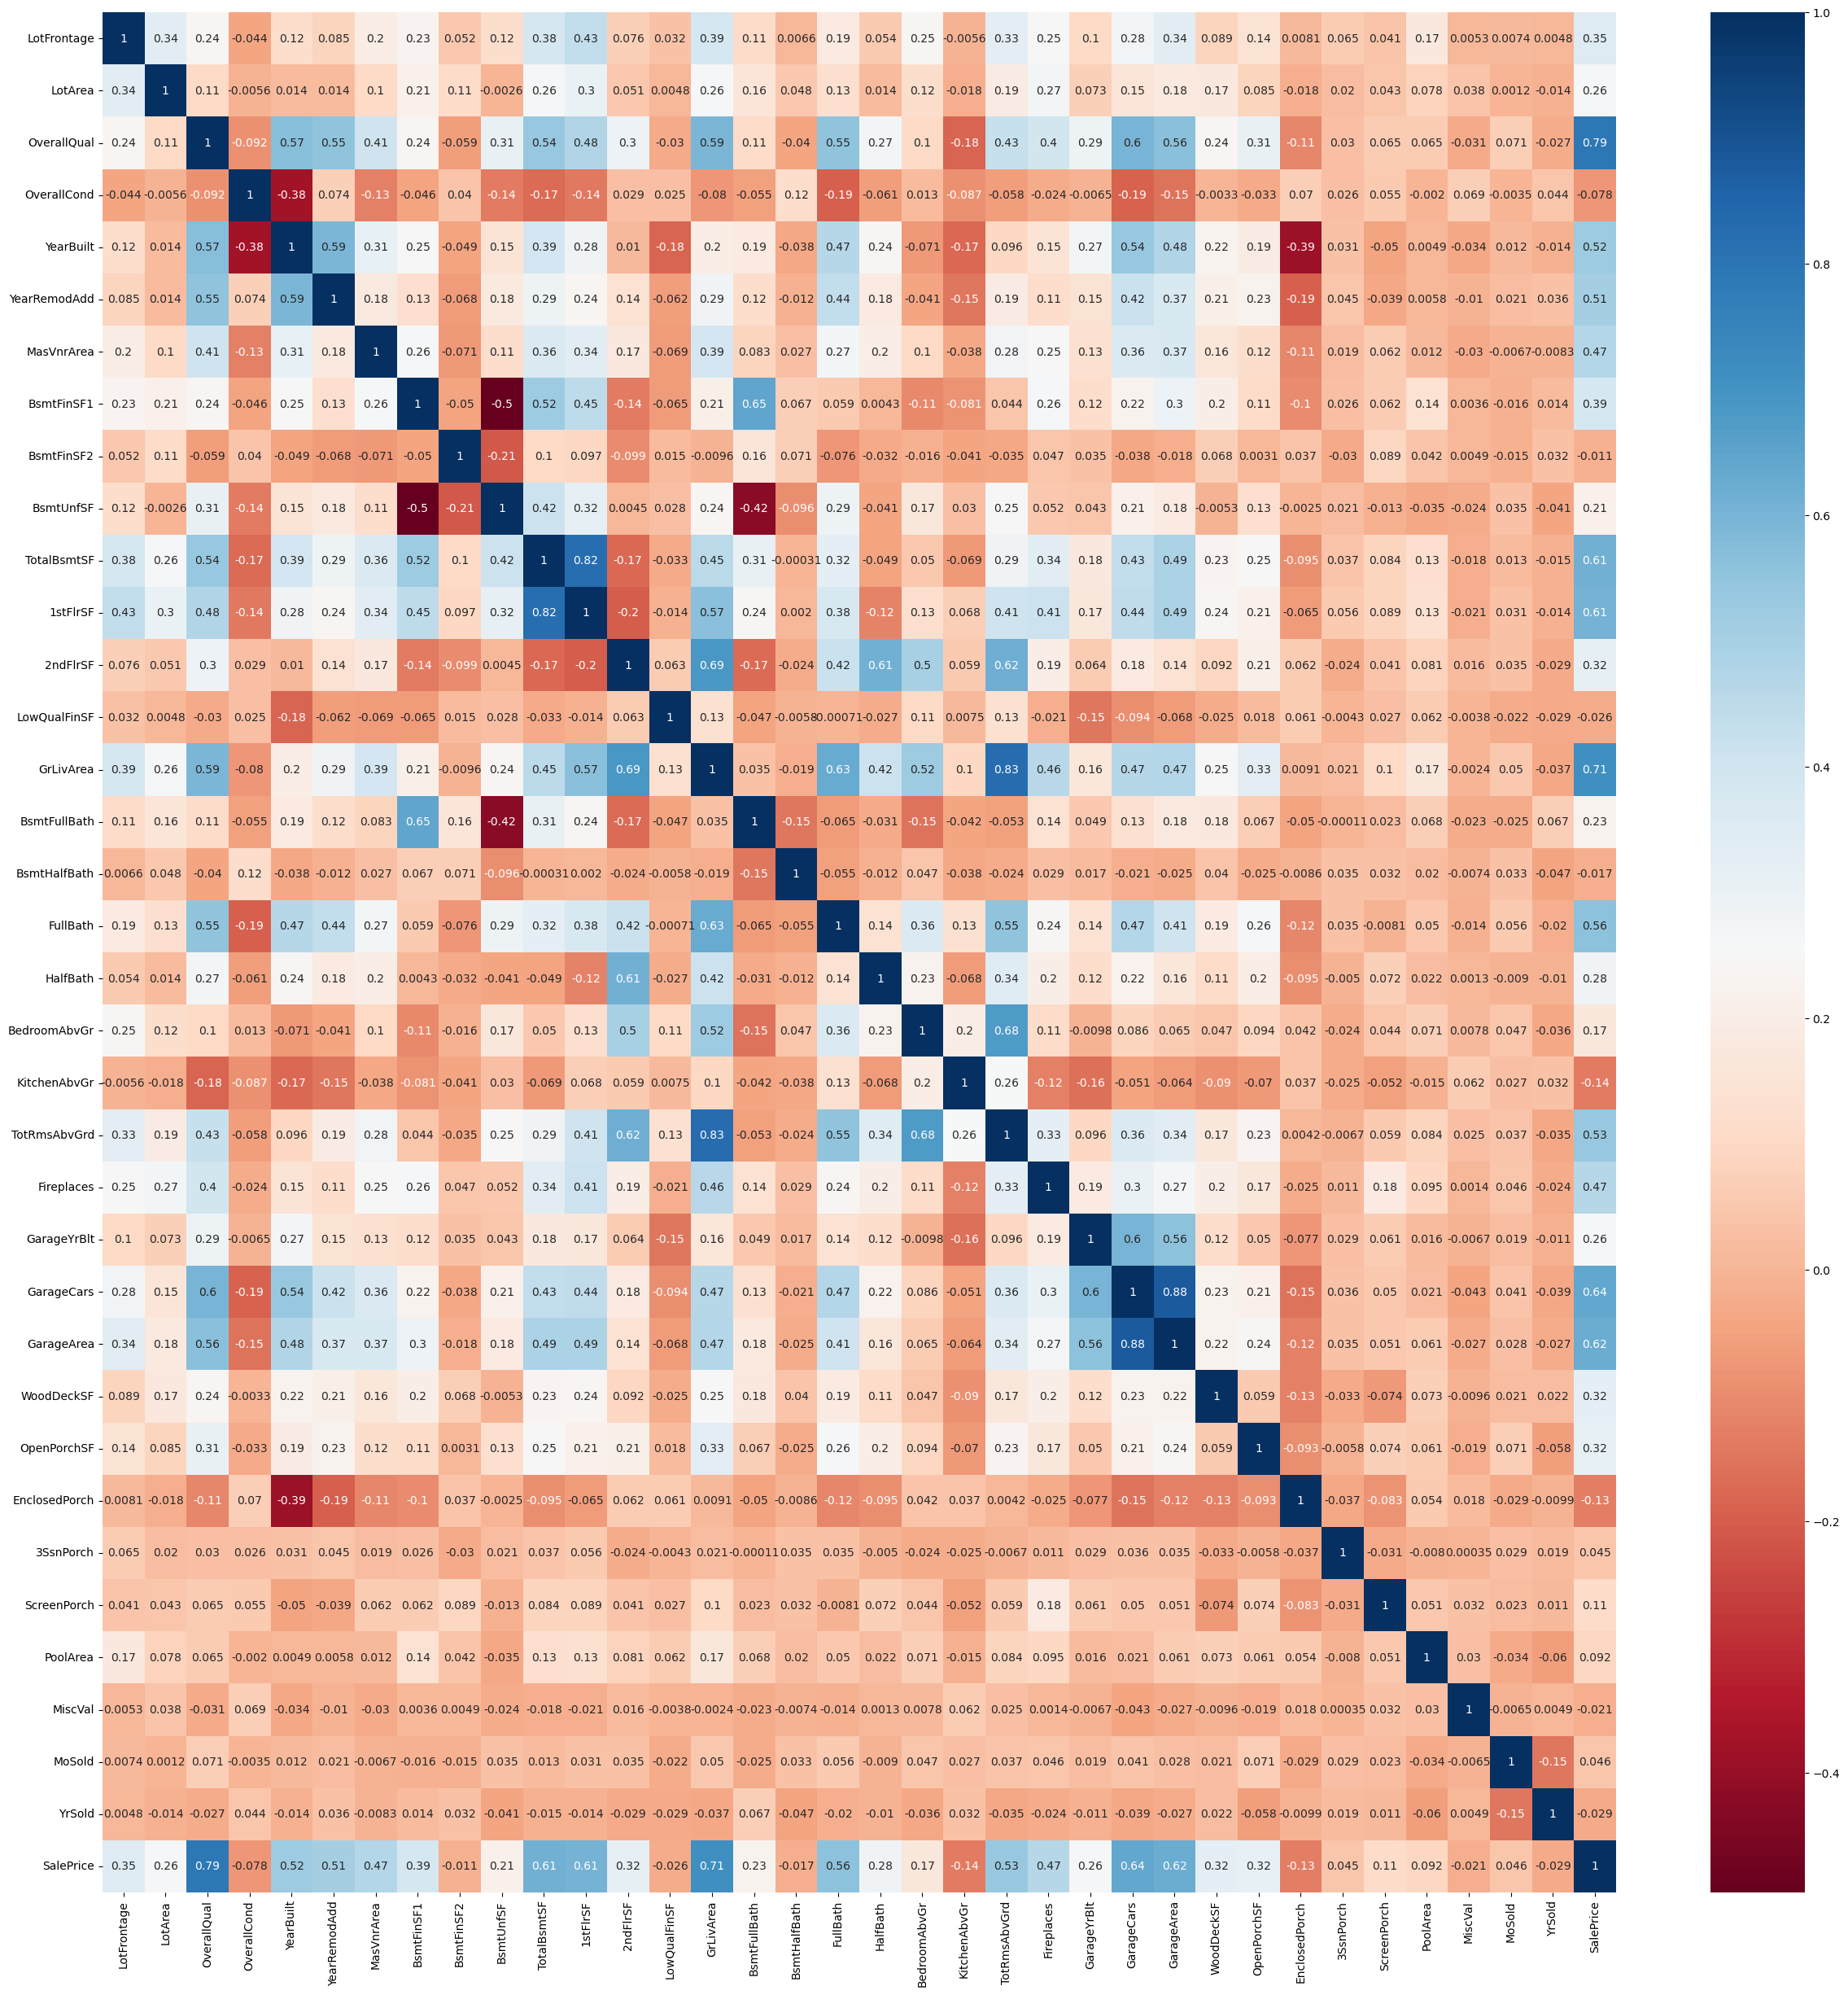

In [18]:
plt.figure(figsize = (30,30))
sns.heatmap(house_price_num_features.corr(), annot = True, cmap="RdBu")
plt.show()

In [19]:
# correlation matrix
cor = house_price_num_features.corr()
cor

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
LotFrontage,1.000000,0.335957,0.239546,-0.043595,0.120999,0.084550,0.195830,0.232576,0.052237,0.119174,...,0.088736,0.141734,0.008057,0.064654,0.041063,0.174567,0.005332,0.007370,0.004756,0.349876
LotArea,0.335957,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,0.111170,-0.002618,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.239546,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,-0.059119,0.308159,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.043595,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,0.040229,-0.136841,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.120999,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,-0.049107,0.149040,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.084550,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,-0.067759,0.181133,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.195830,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,-0.071330,0.113862,...,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.472614
BsmtFinSF1,0.232576,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,-0.050117,-0.495251,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,0.052237,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.071330,-0.050117,1.000000,-0.209294,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378
BsmtUnfSF,0.119174,-0.002618,0.308159,-0.136841,0.149040,0.181133,0.113862,-0.495251,-0.209294,1.000000,...,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.034888,-0.041258,0.214479


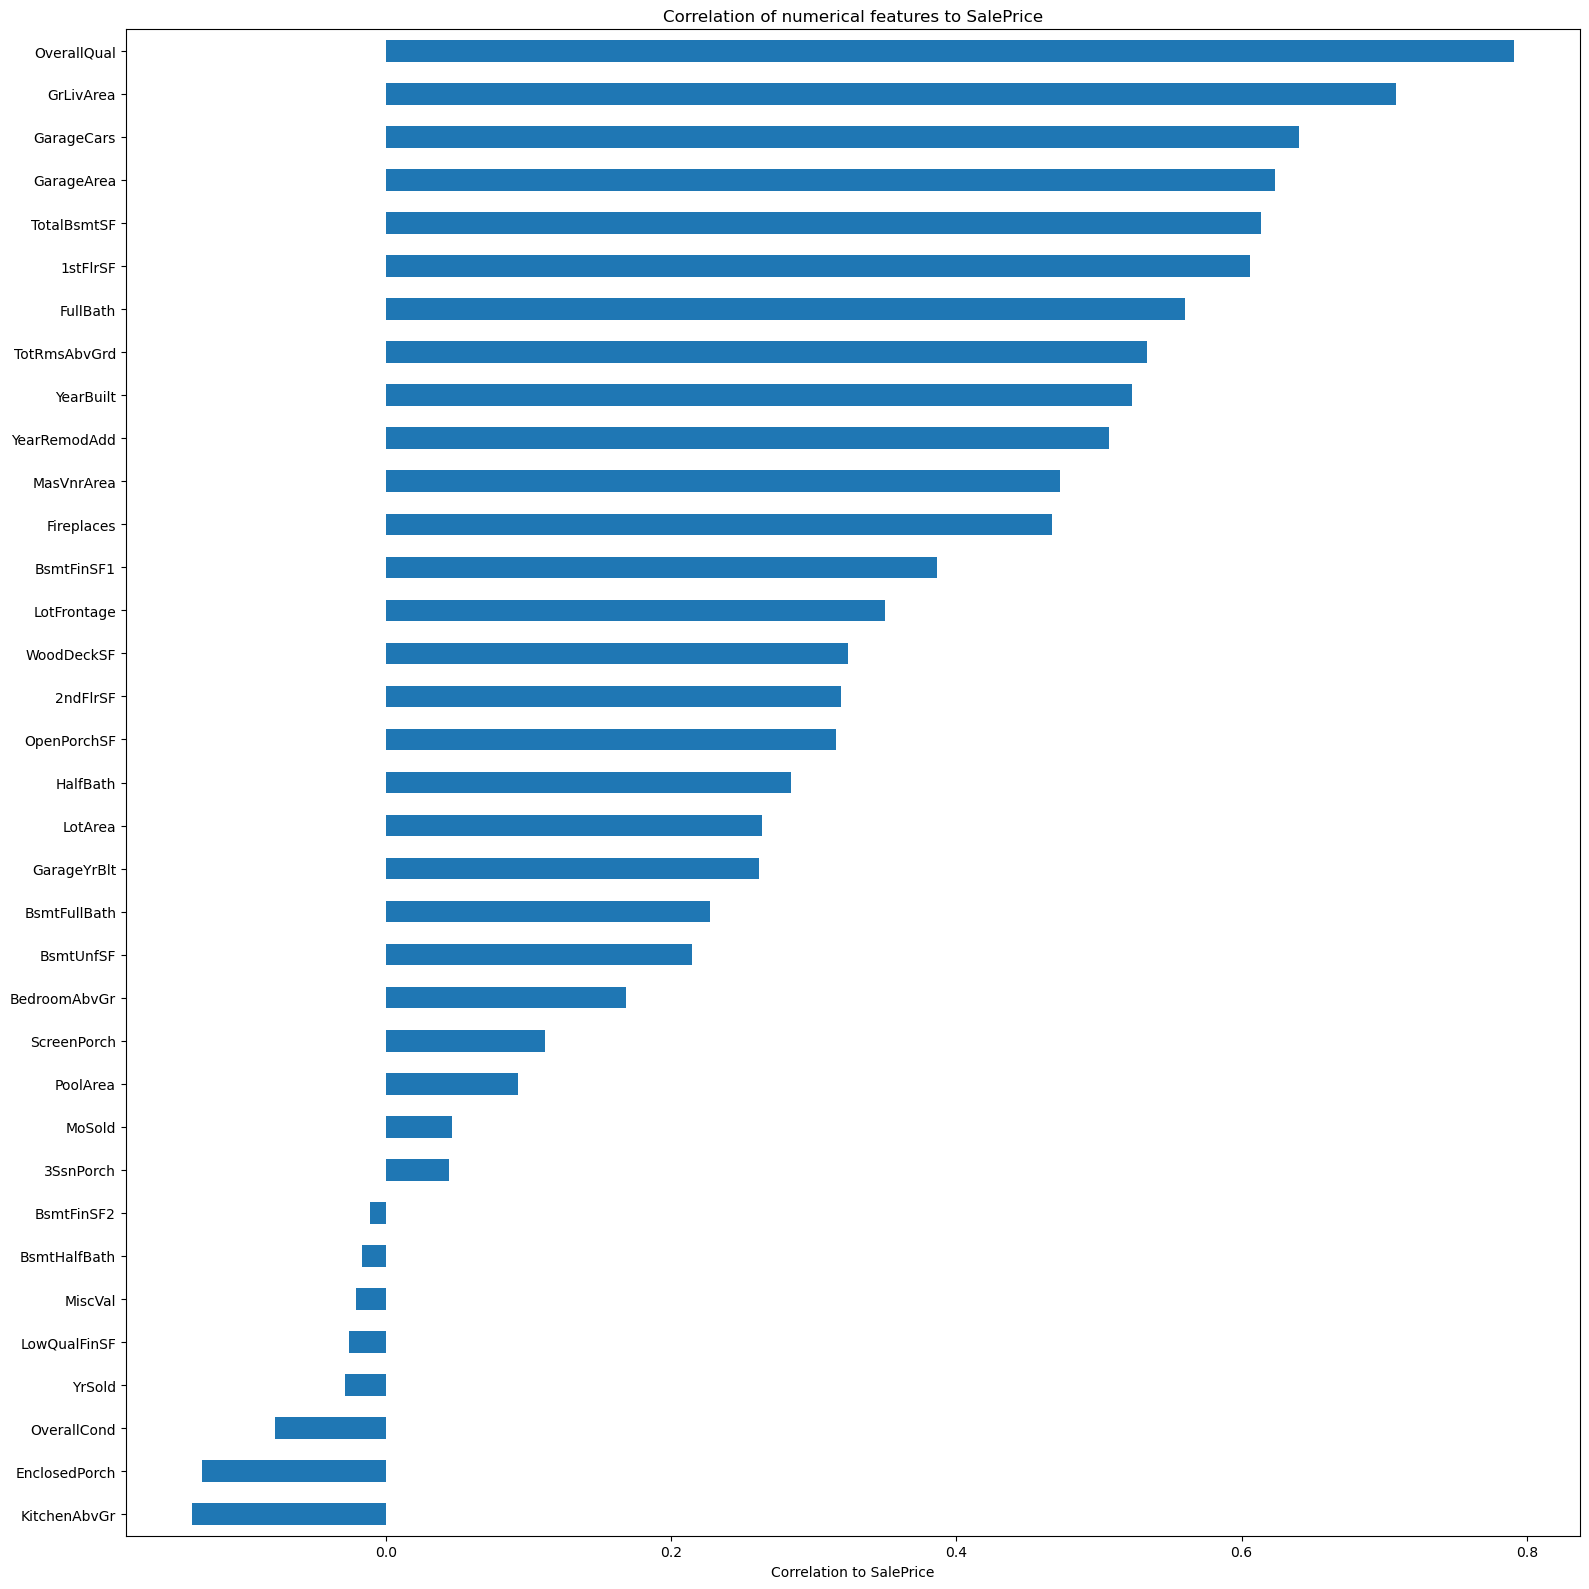

In [20]:
# visualize numerical variables

plt.figure(figsize=(16,16));
cor["SalePrice"].sort_values(ascending=True)[:-1].plot(kind="barh")
plt.title("Correlation of numerical features to SalePrice")
plt.xlabel("Correlation to SalePrice")
plt.tight_layout()
plt.show()

#### Data cleaning dropping coluns 

In [21]:
house_price = house_price.drop(['GarageCars'], axis = 1)
house_price = house_price.drop(['BsmtUnfSF'], axis = 1)
house_price = house_price.drop(['TotRmsAbvGrd'], axis = 1)
house_price = house_price.drop(['GarageYrBlt'], axis = 1)    

In [22]:
house_price.shape

(1460, 77)

###  obtaining derived features

In [23]:
# derived feature prop_age

# PropAge -  Property Age from yearsold - yearbuilt
house_price['prop_age'] = (house_price['YrSold'] - house_price['YearBuilt'])
house_price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,prop_age
0,1,2-STORY 1946 & NEWER,RL,65.0,8450,Pave,No_Alley_Access,Reg,Lvl,AllPub,...,No_Pool,No_Fence,None,0,2,2008,WD,Normal,208500,5
1,2,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Pave,No_Alley_Access,Reg,Lvl,AllPub,...,No_Pool,No_Fence,None,0,5,2007,WD,Normal,181500,31
2,3,2-STORY 1946 & NEWER,RL,68.0,11250,Pave,No_Alley_Access,IR1,Lvl,AllPub,...,No_Pool,No_Fence,None,0,9,2008,WD,Normal,223500,7
3,4,2-STORY 1945 & OLDER,RL,60.0,9550,Pave,No_Alley_Access,IR1,Lvl,AllPub,...,No_Pool,No_Fence,None,0,2,2006,WD,Abnorml,140000,91
4,5,2-STORY 1946 & NEWER,RL,84.0,14260,Pave,No_Alley_Access,IR1,Lvl,AllPub,...,No_Pool,No_Fence,None,0,12,2008,WD,Normal,250000,8


In [24]:
house_price['prop_age'].describe()

count    1460.000000
mean       36.547945
std        30.250152
min         0.000000
25%         8.000000
50%        35.000000
75%        54.000000
max       136.000000
Name: prop_age, dtype: float64

In [25]:
# dropping columns yrbuilt , month built , year sold

house_price = house_price.drop(['MoSold'], axis = 1)
house_price = house_price.drop(['YrSold'], axis = 1)
house_price = house_price.drop(['YearBuilt'], axis = 1)
house_price = house_price.drop(['YearRemodAdd'], axis = 1)
house_price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,SalePrice,prop_age
0,1,2-STORY 1946 & NEWER,RL,65.0,8450,Pave,No_Alley_Access,Reg,Lvl,AllPub,...,0,0,No_Pool,No_Fence,None,0,WD,Normal,208500,5
1,2,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Pave,No_Alley_Access,Reg,Lvl,AllPub,...,0,0,No_Pool,No_Fence,None,0,WD,Normal,181500,31
2,3,2-STORY 1946 & NEWER,RL,68.0,11250,Pave,No_Alley_Access,IR1,Lvl,AllPub,...,0,0,No_Pool,No_Fence,None,0,WD,Normal,223500,7
3,4,2-STORY 1945 & OLDER,RL,60.0,9550,Pave,No_Alley_Access,IR1,Lvl,AllPub,...,0,0,No_Pool,No_Fence,None,0,WD,Abnorml,140000,91
4,5,2-STORY 1946 & NEWER,RL,84.0,14260,Pave,No_Alley_Access,IR1,Lvl,AllPub,...,0,0,No_Pool,No_Fence,None,0,WD,Normal,250000,8


In [26]:
#converting binary variables to numeric by mapping to 0 and 1 

house_price['Street'] = house_price['Street'].apply(lambda x: 1 if x == 'Pave' else 0 )
house_price['CentralAir'] = house_price['CentralAir'].apply(lambda x : 1 if x == 'Y' else 0)
house_price['PavedDrive'] = house_price['PavedDrive'].apply(lambda x : 1 if x == 'Y' else 0)


In [27]:
house_price_cat_features = house_price.select_dtypes (include = ['object'])
house_price_cat_features.columns

Index(['MSSubClass', 'MSZoning', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [28]:
# categorigal features encoding into dummies
house_price_dummies = pd.get_dummies(house_price_cat_features, drop_first=True)
house_price_dummies.head()

,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [29]:
#dropping original categorical columns
house_price = house_price.drop(list(house_price_cat_features.columns), axis=1)

In [30]:
#concatenating dummy columns to original dataframe
house_price  = pd.concat([house_price,house_price_dummies], axis=1)

In [31]:
house_price= house_price.drop(['Id'],axis=1)

### test/train split

In [32]:
#train_test_split
df_train,df_test=train_test_split(house_price,train_size=0.70, random_state=100)
df_train.shape

(1021, 266)

In [33]:
df_train.shape

(1021, 266)

####  Data transformation - scaling numerical features and tranforming target feature , as the target follows a skewd distribution , applying log transform 

In [34]:
y_train = np.log(df_train.SalePrice)
X_train = df_train.drop("SalePrice",1)
# tranforming the test target variable
y_test= np.log(df_test.SalePrice)
X_test = df_test.drop("SalePrice",1)


In [35]:
num_vars=X_train.select_dtypes(include=['int64','float64']).columns

In [36]:
scaler = StandardScaler()
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.transform(X_test[num_vars])


In [37]:
X_train.shape

(1021, 265)

In [38]:
# fitting a linear regression model on the train data
lm_1=LinearRegression()
lm_1.fit(X_train,y_train)


LinearRegression()

In [39]:
# predict
y_train_pred = lm_1.predict(X_train)
metrics.r2_score(y_true=y_train, y_pred=y_train_pred)

0.9563331018176568

In [40]:

y_test_pred = lm_1.predict(X_test)
metrics.r2_score(y_true=y_test, y_pred=y_test_pred)

-1.367819069884668e+22

### Lasso and Ridge Regression

In [41]:
# Checking the dimension of X_train & y_train
print("X_train", X_train.shape)
print("y_train", y_train.shape)

X_train (1021, 265)
y_train (1021,)


#### Ridge regression


In [42]:
# alpha values hyper parameter tuning
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1,0.5, 1.0,2.0,3.0,4.0, 5.0, 10.0]}

ridge = Ridge()

# using grid search CV for hyper parameter tuning

folds = 5
model_ridge_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params,                       
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_ridge_cv.fit(X_train, y_train) 



Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.5, 1.0,
                                   2.0, 3.0, 4.0, 5.0, 10.0]},
             return_train_score=True, verbose=1)

In [43]:
cv_results = pd.DataFrame(model_ridge_cv.cv_results_)

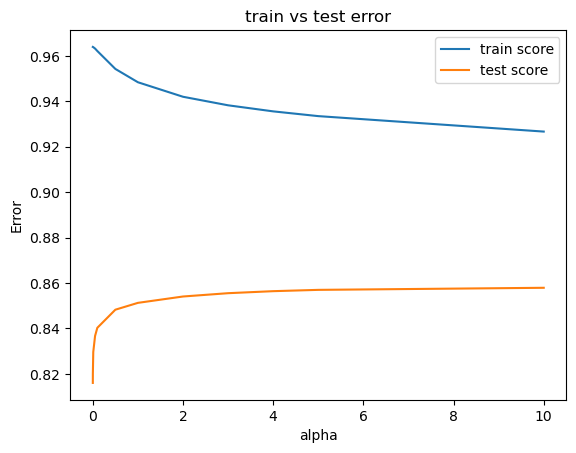

In [44]:
# plotting the cross validation scores for different alpha parameter values


# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Error')
plt.title('train vs test error')
plt.legend(['train score', 'test score'])
plt.show()


In [73]:
alpha= 2

# fitting the ridge regularization model with alpha = 4
# ridge regression
lm_ridge = Ridge(alpha=2)
lm_ridge.fit(X_train, y_train)

# predict
y_train_pred = lm_ridge.predict(X_train)
print("Ridge Train R2 score {}".format(metrics.r2_score(y_true=y_train, y_pred=y_train_pred)))
y_test_pred = lm_ridge.predict(X_test)
print("Ridge Test R2 score {}" .format(metrics.r2_score(y_true=y_test, y_pred=y_test_pred)))

Ridge Train R2 score 0.9377510811644367
Ridge Test R2 score 0.8737233881977401


In [74]:
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
print("RMSE Ridge regression model {} " .format(RMSE)) 

RMSE Ridge regression model 0.14426451904959595 


In [47]:
# ridge regression coef and intercepts
coef = lm_ridge.coef_
intercept =lm_ridge.intercept_

In [48]:
# list of column names
cols = X_train.columns

In [49]:
lm_ridge_parameters= []
lm_ridge_parameters = coef
lm_ridge_parameters =np.insert(lm_ridge_parameters,0, intercept)
cols = cols.insert(0,'Constant')

In [50]:
ridge_regression_coef = pd.DataFrame(data=zip(cols,lm_ridge_parameters),columns=['Variable','Coef'])

In [51]:
# top 10 ridge regression coefficients
ridge_coeff = ridge_regression_coef.sort_values(by=['Coef'], ascending = False)
ridge_coeff.head(10) 

,Variable,Coef
0,Constant,11.475457
48,MSZoning_RL,0.152422
255,SaleType_ConLD,0.147037
47,MSZoning_RH,0.139859
46,MSZoning_FV,0.132236
126,RoofMatl_WdShngl,0.130983
49,MSZoning_RM,0.122056
70,Neighborhood_Crawfor,0.110015
80,Neighborhood_NridgHt,0.106724
86,Neighborhood_StoneBr,0.105474


#### Lasso regression


In [52]:
# alpha values hyper parameter tuning
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1,0.5, 1.0,2.0,3.0,4.0, 5.0, 10.0]}

lasso = Lasso()

# using grid search CV for hyper parameter tuning

folds = 5
model_lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params,                       
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_lasso_cv.fit(X_train, y_train) 



Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.5, 1.0,
                                   2.0, 3.0, 4.0, 5.0, 10.0]},
             return_train_score=True, verbose=1)

In [53]:
cv_results_lasso = pd.DataFrame(model_lasso_cv.cv_results_)

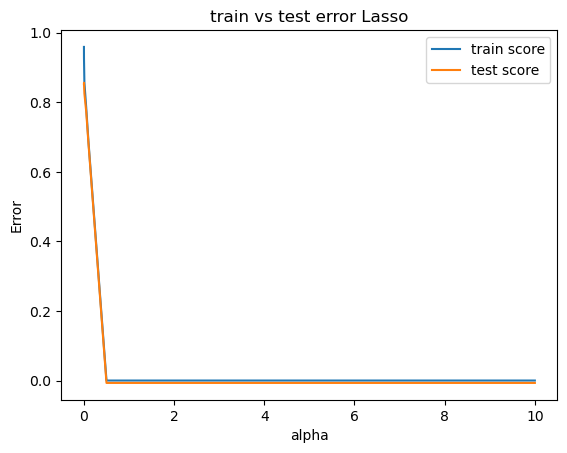

In [54]:
# plotting the cross validation scores for different alpha parameter values

cv_results_lasso['param_alpha'] = cv_results_lasso['param_alpha'].astype('float32')
# plotting
plt.plot(cv_results_lasso['param_alpha'], cv_results_lasso['mean_train_score'])
plt.plot(cv_results_lasso['param_alpha'], cv_results_lasso['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Error')
plt.title('train vs test error Lasso')
plt.legend(['train score', 'test score'])
plt.show()


In [55]:
alpha= 0.01

# fitting the Lasso regularization model with alpha = 0.01
# lasso regression0
lm_lasso = Lasso(alpha=0.01)
lm_lasso.fit(X_train, y_train)

# predict
y_train_pred = lm_lasso.predict(X_train)
print("Lasso Train R2 score {}".format(metrics.r2_score(y_true=y_train, y_pred=y_train_pred)))
y_test_pred = lm_lasso.predict(X_test)
print("Lasso Test R2 score {}".format(metrics.r2_score(y_true=y_test, y_pred=y_test_pred)))

Lasso Train R2 score 0.8534341655348698
Lasso Test R2 score 0.8537818193865572


In [56]:
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
print("RMSE lasso regression model {} " .format(RMSE)) 

RMSE lasso regression model 0.1552382576825763 


### Residual analysis
Valiating the linear regression assumption, error terms should be normally ditributed with mean =0 

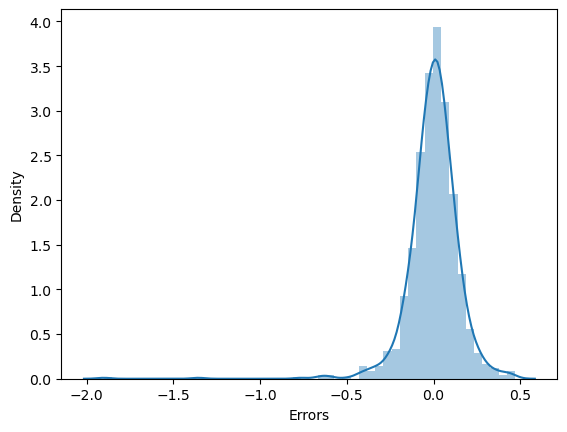

In [66]:
error_term = y_train - y_train_pred
sns.distplot(error_term)
plt.xlabel('Errors')
plt.show()

In [57]:
#Lasso regression coef and intercepts
coef = lm_lasso.coef_
intercept =lm_lasso.intercept_

In [58]:
# list of column names
cols = X_train.columns

In [59]:
lm_lasso_parameters= []
lm_lasso_parameters = coef
lm_lasso_parameters =np.insert(lm_lasso_parameters,0, intercept)
cols = cols.insert(0,'Constant')

In [60]:
lasso_regression_coef = pd.DataFrame(data=zip(cols,lm_lasso_parameters),columns=['Variable','Coef'])

In [61]:
# top 10 lasso regression coefficients
lasso_regression_coef = lasso_regression_coef[(lasso_regression_coef['Coef'] != 0)]
lasso_regression_coef = lasso_regression_coef.sort_values(by=['Coef'], ascending = False)
lasso_regression_coef.head(10) 

,Variable,Coef
0,Constant,12.010508
4,OverallQual,0.129634
14,GrLivArea,0.104560
22,GarageArea,0.046146
5,OverallCond,0.036115
15,BsmtFullBath,0.030441
21,Fireplaces,0.029518
9,TotalBsmtSF,0.021572
17,FullBath,0.016780
10,CentralAir,0.015577


In [64]:
# bottom 10 lasso regression cofficients
lasso_regression_coef.tail(5) 

,Variable,Coef
18,HalfBath,0.000393
203,HeatingQC_TA,-0.003721
20,KitchenAbvGr,-0.007473
29,PoolArea,-0.017968
31,prop_age,-0.080666


### Obsevations

Regression using Lasso regularization assigns zero value to insignificant features, helps in chossing better predictors.

As per the Lasso regression , top features with positive correlation values which impacts the prediction,

1. OverallQual	(Rates the overall material and finish of the house)
2. GrLivArea    (Above grade (ground) living area square feet )  
3. GarageArea   (Size of garage in square feet)
4. OverallCond  (Rates the overall condition of the house)
5. BsmtFullBath (Basement full bathrooms)


top features with negative correlation
1. prop_age	    (age of the property at the time of selling)
2. PoolArea
3. HeatingQC    (Heating quality and condition)

